## Vehicle Type Recognition

In this colab we are going to train a model that can detect the type of the vehicle

1. Become one with the data (visualize,visualize,visualize)
2. Preprocess the data  (prepare it for model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model

* Let's step through each


## Import and become one with the data

In [2]:
# let see the content of our data directory
!ls /content/drive/MyDrive/Data/Vehicle_Dataset

Test  Train


In [3]:
# let see train and test directory seperately
!ls /content/drive/MyDrive/Data/Vehicle_Dataset/Train

Bus  Car  Motorcycle


In [4]:
!ls /content/drive/MyDrive/Data/Vehicle_Dataset/Test

Bus  Car  Motorcycle


In [5]:
import os

# walk through vehicle_dataset directory and list number of files

for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Data/Vehicle_Dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} .")

There are 2 directories and 0 images in /content/drive/MyDrive/Data/Vehicle_Dataset .
There are 3 directories and 0 images in /content/drive/MyDrive/Data/Vehicle_Dataset/Test .
There are 0 directories and 20 images in /content/drive/MyDrive/Data/Vehicle_Dataset/Test/Bus .
There are 0 directories and 20 images in /content/drive/MyDrive/Data/Vehicle_Dataset/Test/Car .
There are 0 directories and 20 images in /content/drive/MyDrive/Data/Vehicle_Dataset/Test/Motorcycle .
There are 3 directories and 0 images in /content/drive/MyDrive/Data/Vehicle_Dataset/Train .
There are 0 directories and 80 images in /content/drive/MyDrive/Data/Vehicle_Dataset/Train/Bus .
There are 1 directories and 80 images in /content/drive/MyDrive/Data/Vehicle_Dataset/Train/Car .
There are 0 directories and 0 images in /content/drive/MyDrive/Data/Vehicle_Dataset/Train/Car/.ipynb_checkpoints .
There are 1 directories and 80 images in /content/drive/MyDrive/Data/Vehicle_Dataset/Train/Motorcycle .
There are 0 directories

In [6]:
# get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/Data/Vehicle_Dataset/Train")
class_names = np.array(sorted(([item.name for item in data_dir.glob("*")]))) # created a list of class_names from the subdirectories
print(class_names)

['Bus' 'Car' 'Motorcycle']


In [7]:
# let's visualize the our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory (we will view images from here)
  target_folder=target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder +"/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape : {img.shape}") # show the shape of the image

  return img

Image shape : (600, 900, 3)


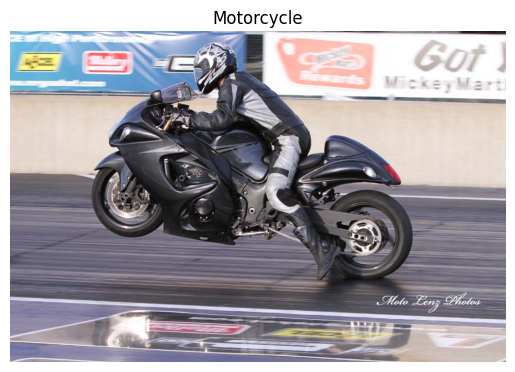

In [8]:
# view a random image from the training dataset
img = view_random_image(target_dir="/content/drive/MyDrive/Data/Vehicle_Dataset/Train/",target_class="Motorcycle")

In [9]:
img # this is actually a numpy array

array([[[119, 181, 202],
        [118, 180, 201],
        [115, 180, 202],
        ...,
        [ 37,  46,  51],
        [ 38,  47,  52],
        [ 38,  47,  52]],

       [[134, 200, 226],
        [131, 197, 223],
        [126, 193, 220],
        ...,
        [ 31,  38,  44],
        [ 32,  39,  45],
        [ 32,  39,  45]],

       [[127, 199, 237],
        [122, 194, 232],
        [116, 188, 226],
        ...,
        [ 34,  35,  40],
        [ 33,  34,  39],
        [ 33,  34,  39]],

       ...,

       [[127, 126, 157],
        [129, 128, 159],
        [133, 132, 163],
        ...,
        [213, 210, 229],
        [199, 196, 215],
        [187, 184, 203]],

       [[144, 144, 168],
        [150, 150, 174],
        [159, 159, 183],
        ...,
        [176, 166, 193],
        [158, 148, 175],
        [148, 138, 165]],

       [[187, 188, 208],
        [192, 193, 213],
        [201, 202, 222],
        ...,
        [136, 123, 153],
        [122, 109, 139],
        [118, 105, 135]]

In [10]:
# Because it is nump array, we can convert it into tensor
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(600, 900, 3), dtype=uint8, numpy=
array([[[119, 181, 202],
        [118, 180, 201],
        [115, 180, 202],
        ...,
        [ 37,  46,  51],
        [ 38,  47,  52],
        [ 38,  47,  52]],

       [[134, 200, 226],
        [131, 197, 223],
        [126, 193, 220],
        ...,
        [ 31,  38,  44],
        [ 32,  39,  45],
        [ 32,  39,  45]],

       [[127, 199, 237],
        [122, 194, 232],
        [116, 188, 226],
        ...,
        [ 34,  35,  40],
        [ 33,  34,  39],
        [ 33,  34,  39]],

       ...,

       [[127, 126, 157],
        [129, 128, 159],
        [133, 132, 163],
        ...,
        [213, 210, 229],
        [199, 196, 215],
        [187, 184, 203]],

       [[144, 144, 168],
        [150, 150, 174],
        [159, 159, 183],
        ...,
        [176, 166, 193],
        [158, 148, 175],
        [148, 138, 165]],

       [[187, 188, 208],
        [192, 193, 213],
        [201, 202, 222],
        ...,
        [136, 123, 15

In [11]:
img.shape

(600, 900, 3)

In [12]:
# get all pixel values between 0 & 1
img/255

array([[[0.46666667, 0.70980392, 0.79215686],
        [0.4627451 , 0.70588235, 0.78823529],
        [0.45098039, 0.70588235, 0.79215686],
        ...,
        [0.14509804, 0.18039216, 0.2       ],
        [0.14901961, 0.18431373, 0.20392157],
        [0.14901961, 0.18431373, 0.20392157]],

       [[0.5254902 , 0.78431373, 0.88627451],
        [0.51372549, 0.77254902, 0.8745098 ],
        [0.49411765, 0.75686275, 0.8627451 ],
        ...,
        [0.12156863, 0.14901961, 0.17254902],
        [0.1254902 , 0.15294118, 0.17647059],
        [0.1254902 , 0.15294118, 0.17647059]],

       [[0.49803922, 0.78039216, 0.92941176],
        [0.47843137, 0.76078431, 0.90980392],
        [0.45490196, 0.7372549 , 0.88627451],
        ...,
        [0.13333333, 0.1372549 , 0.15686275],
        [0.12941176, 0.13333333, 0.15294118],
        [0.12941176, 0.13333333, 0.15294118]],

       ...,

       [[0.49803922, 0.49411765, 0.61568627],
        [0.50588235, 0.50196078, 0.62352941],
        [0.52156863, 0

Our data is uploaded to google colab correctly. Now, let's get data and preprocess it

## 2. Preprocess the data

In [13]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
from keras.layers.serialization import activation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data (get all of pixel values between 0 & 1),also called as scaling
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our data directories
train_dir="/content/drive/MyDrive/Data/Vehicle_Dataset/Train/"
test_dir="/content/drive/MyDrive/Data/Vehicle_Dataset/Test/"

# import the data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               seed=42
                                               )

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               seed=42
                                               )


Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


we have preprocessed the data, let's create the model

## 3. Create the CNN model

In [14]:
# build the cnn model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)
                           ),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,activation="softmax")
])

# compile the model
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

## 4. Fit the model

In [15]:
hist = model.fit(train_data,
                 epochs=10,
                 steps_per_epoch=len(train_data),
                 validation_data=test_data,
                 validation_steps=len(test_data)
                 )

Epoch 1/10
8/8 [==============================] - 16s 930ms/step - loss: 1.1069 - accuracy: 0.3000 - val_loss: 1.0968 - val_accuracy: 0.3500
Epoch 2/10
8/8 [==============================] - 6s 794ms/step - loss: 1.0957 - accuracy: 0.3833 - val_loss: 1.0937 - val_accuracy: 0.4167
Epoch 3/10
8/8 [==============================] - 7s 910ms/step - loss: 1.0908 - accuracy: 0.4375 - val_loss: 1.0916 - val_accuracy: 0.3333
Epoch 4/10
8/8 [==============================] - 6s 694ms/step - loss: 1.0805 - accuracy: 0.4250 - val_loss: 1.0868 - val_accuracy: 0.3833
Epoch 5/10
8/8 [==============================] - 6s 831ms/step - loss: 1.0614 - accuracy: 0.4375 - val_loss: 1.0722 - val_accuracy: 0.4667
Epoch 6/10
8/8 [==============================] - 6s 821ms/step - loss: 1.0217 - accuracy: 0.5250 - val_loss: 1.0313 - val_accuracy: 0.5167
Epoch 7/10
8/8 [==============================] - 6s 697ms/step - loss: 0.9668 - accuracy: 0.6000 - val_loss: 1.0122 - val_accuracy: 0.5167
Epoch 8/10
8/8 [===

In [16]:
# To evaluate the model let's make a function to visualize the model histroy

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

## 5.Evaluate the model

In [17]:
model.evaluate(test_data)

2/2 [==============================] - 1s 243ms/step - loss: 0.9103 - accuracy: 0.5500


[0.9102551341056824, 0.550000011920929]

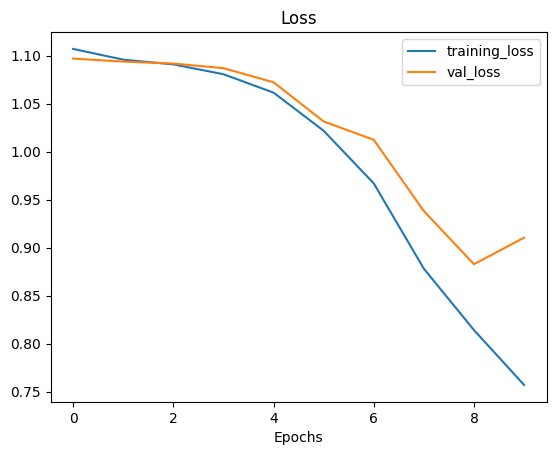

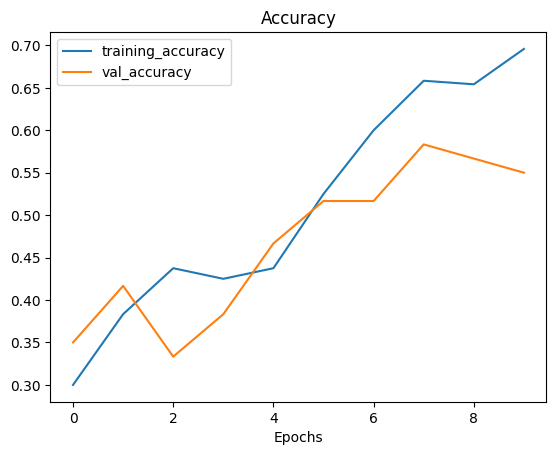

In [18]:
plot_loss_curves(hist)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0

In [20]:
# To make predictions we will make a function
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots
  the image with the predicted class as title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Add in logic for multi-class & get pred_class_name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False)

In [21]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channel )
  """

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_jpeg(img)
  # resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
  # Rescale the image (get all values between 0 & 1)
  img=img/255.

  return img

In [22]:
# Make a prediction using model
# let's get random image from directories
car=random.sample(os.listdir("/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Car"),1)
bus=random.sample(os.listdir("/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Bus"),1)
motor=random.sample(os.listdir("/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Motorcycle"),1)
car = "/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Car/"+car[0]
bus = "/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Bus/"+bus[0]
motor = "/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Motorcycle/"+motor[0]
car,bus,motor

('/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Car/Image_100.jpg',
 '/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Bus/Image_87.jpg',
 '/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Motorcycle/Image_99.jpg')

1/1 [==============================] - 0s 256ms/step


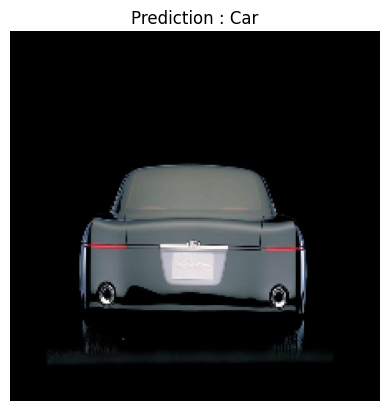

In [23]:
# let's make prediction
pred_and_plot(model=model,
              filename=car,
              class_names=class_names
              )

1/1 [==============================] - 0s 21ms/step


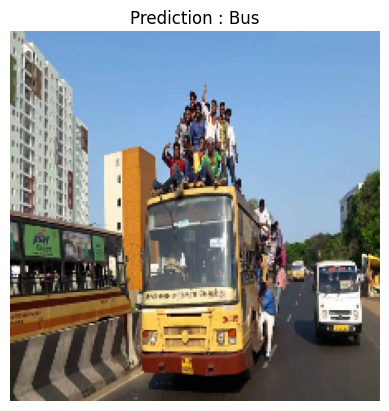

In [24]:
# let's make prediction
pred_and_plot(model=model,
              filename=bus,
              class_names=class_names
              )

1/1 [==============================] - 0s 24ms/step


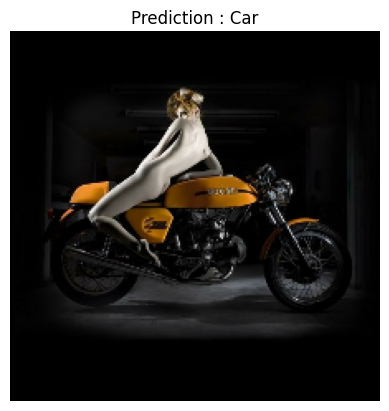

In [25]:
# let's make prediction
pred_and_plot(model=model,
              filename=motor,
              class_names=class_names
              )

## 6. Adjust parameters

Looks like our model is learning actually model works better than expected. However, we are going to try to improve model

1. Reduce the model complexity
2. Train longer

In [26]:
 # lets create the model
 # build the cnn model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)
                           ),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,activation="softmax")
])

# compile the model
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

hist_1 = model.fit(train_data,
                 epochs=20,
                 steps_per_epoch=len(train_data),
                 validation_data=test_data,
                 validation_steps=len(test_data)
                 )

Epoch 1/20
8/8 [==============================] - 9s 824ms/step - loss: 1.0943 - accuracy: 0.3708 - val_loss: 1.0885 - val_accuracy: 0.3167
Epoch 2/20
8/8 [==============================] - 6s 800ms/step - loss: 1.0665 - accuracy: 0.3625 - val_loss: 1.0723 - val_accuracy: 0.4500
Epoch 3/20
8/8 [==============================] - 7s 904ms/step - loss: 1.0460 - accuracy: 0.4833 - val_loss: 1.0472 - val_accuracy: 0.4333
Epoch 4/20
8/8 [==============================] - 6s 812ms/step - loss: 0.9871 - accuracy: 0.5958 - val_loss: 1.0073 - val_accuracy: 0.4333
Epoch 5/20
8/8 [==============================] - 6s 704ms/step - loss: 0.8953 - accuracy: 0.6083 - val_loss: 0.9618 - val_accuracy: 0.4833
Epoch 6/20
8/8 [==============================] - 7s 778ms/step - loss: 0.8658 - accuracy: 0.5708 - val_loss: 0.9164 - val_accuracy: 0.5667
Epoch 7/20
8/8 [==============================] - 7s 923ms/step - loss: 0.7674 - accuracy: 0.6875 - val_loss: 0.9323 - val_accuracy: 0.6167
Epoch 8/20
8/8 [====

Looks like our model is better than the previous one. However, our model might overfitting !!!

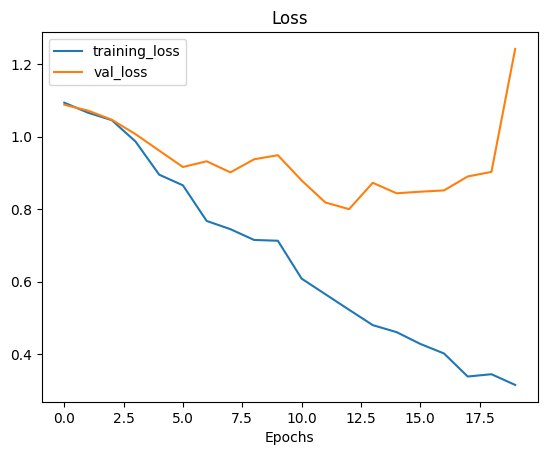

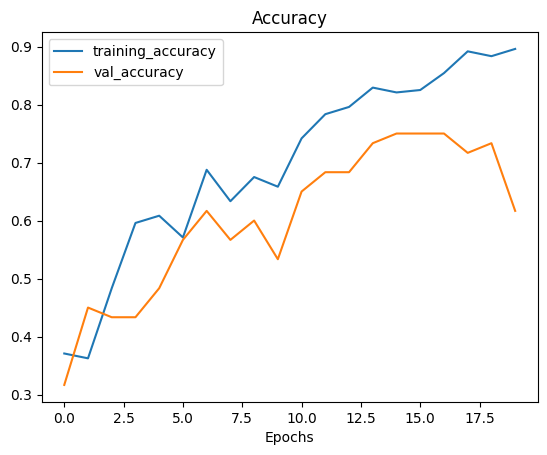

In [27]:
plot_loss_curves(hist_1)

In [56]:
# Make a prediction using model
# let's get random image from directories
car=random.sample(os.listdir("/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Car"),1)
bus=random.sample(os.listdir("/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Bus"),1)
motor=random.sample(os.listdir("/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Motorcycle"),1)
car = "/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Car/"+car[0]
bus = "/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Bus/"+bus[0]
motor = "/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Motorcycle/"+motor[0]
car,bus,motor

('/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Car/Image_83.jpg',
 '/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Bus/Image_100.jpg',
 '/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Motorcycle/Image_81.jpg')

1/1 [==============================] - 0s 27ms/step


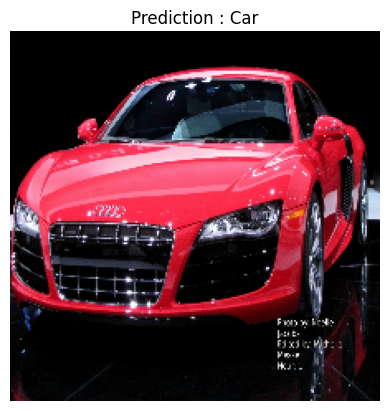

In [57]:
# let's make predictions with our new model
# let's make prediction
pred_and_plot(model=model,
              filename=car,
              class_names=class_names
              )

1/1 [==============================] - 0s 19ms/step


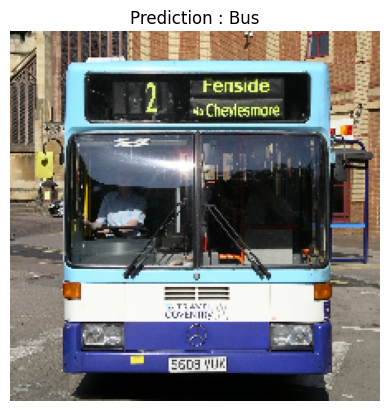

In [58]:
# let's make prediction
pred_and_plot(model=model,
              filename=bus,
              class_names=class_names
              )

1/1 [==============================] - 0s 22ms/step


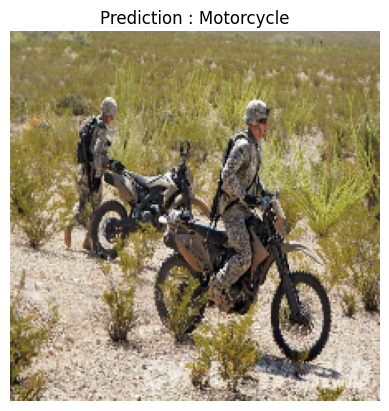

In [59]:
# let's make prediction
pred_and_plot(model=model,
              filename=motor,
              class_names=class_names
              )

We have improved our model accuracy but our model is a little bit overfitting to overcome this problem we can use data augmentation

In [60]:
# Create an augmented data generator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          )

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical",
                                                                   )

Found 240 images belonging to 3 classes.


## let's create the model and fit the model with augmented data and train for longer

In [61]:
 # lets create the model
 # build the cnn model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)
                           ),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,activation="softmax")
])

# compile the model
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

hist_1 = model.fit(train_data_augmented,
                 epochs=41,
                 steps_per_epoch=len(train_data_augmented),
                 validation_data=test_data,
                 validation_steps=len(test_data)
                 )

Epoch 1/41
8/8 [==============================] - 12s 1s/step - loss: 1.1137 - accuracy: 0.3542 - val_loss: 1.1017 - val_accuracy: 0.4167
Epoch 2/41
8/8 [==============================] - 8s 931ms/step - loss: 1.0835 - accuracy: 0.3958 - val_loss: 1.0837 - val_accuracy: 0.4333
Epoch 3/41
8/8 [==============================] - 9s 1s/step - loss: 1.0754 - accuracy: 0.4000 - val_loss: 1.0681 - val_accuracy: 0.4000
Epoch 4/41
8/8 [==============================] - 9s 1s/step - loss: 1.0679 - accuracy: 0.3833 - val_loss: 1.0405 - val_accuracy: 0.4333
Epoch 5/41
8/8 [==============================] - 8s 1s/step - loss: 1.0378 - accuracy: 0.5333 - val_loss: 1.0149 - val_accuracy: 0.4167
Epoch 6/41
8/8 [==============================] - 9s 1s/step - loss: 0.9763 - accuracy: 0.5125 - val_loss: 0.9423 - val_accuracy: 0.5667
Epoch 7/41
8/8 [==============================] - 9s 1s/step - loss: 0.9568 - accuracy: 0.5375 - val_loss: 0.8941 - val_accuracy: 0.5500
Epoch 8/41
8/8 [=====================

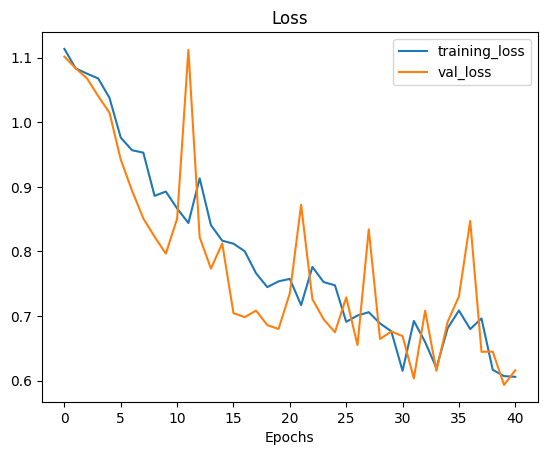

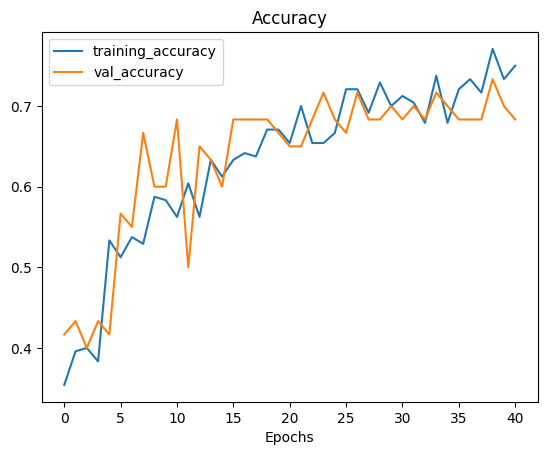

In [62]:
plot_loss_curves(hist_1)

With this model, our loss curves get closed each other.
Looks like we beat the baseline and overfitting

In [63]:
# let's make predictions

In [168]:
# Make a prediction using model
# let's get random image from directories
car=random.sample(os.listdir("/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Car"),1)
bus=random.sample(os.listdir("/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Bus"),1)
motor=random.sample(os.listdir("/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Motorcycle"),1)
car = "/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Car/"+car[0]
bus = "/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Bus/"+bus[0]
motor = "/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Motorcycle/"+motor[0]
car,bus,motor

('/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Car/Image_85.jpg',
 '/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Bus/Image_98.jpg',
 '/content/drive/MyDrive/Data/Vehicle_Dataset/Test/Motorcycle/Image_87.jpg')

1/1 [==============================] - 0s 19ms/step


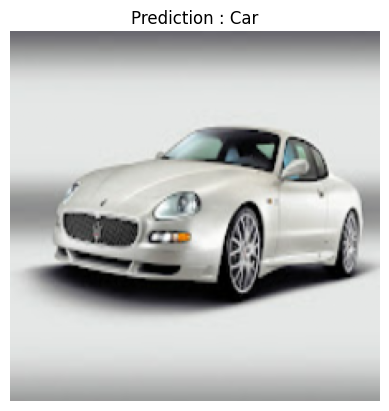

In [169]:
pred_and_plot(model=model,
              filename=car,
              class_names=class_names
              )

1/1 [==============================] - 0s 20ms/step


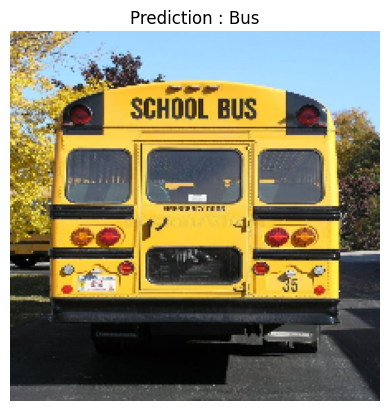

In [170]:
pred_and_plot(model=model,
              filename=bus,
              class_names=class_names
              )

1/1 [==============================] - 0s 19ms/step


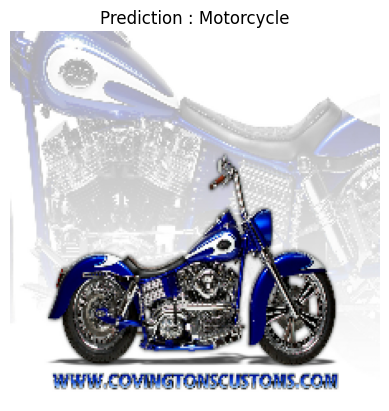

In [171]:
pred_and_plot(model=model,
              filename=motor,
              class_names=class_names
              )